# Getting news

In [ ]:
from newspaper import  Article
import newspaper
import pandas as pd
from textblob import TextBlob
from newspaper import Config
import nltk

In [ ]:
# experimenting with libs 

site = newspaper.build("https://edition.cnn.com/?refresh=1", memoize_articles=False)
# site = newspaper.build("https://www.bbc.com/news", memoize_articles=False)
# site = newspaper.build("https://www.foxnews.com/", memoize_articles=False)
# site = newspaper.build("https://news.sky.com/", memoize_articles=False)


# get list of article URLs
top_articles = site.article_urls()


ar = top_articles[:90]

In [ ]:
len(top_articles)

In [ ]:
# seeing whether the ariticle and summary method works 

# top_articles.remove('http://www.slideshare.net/Wisec/http-parameter-pollution-a-new-category-of-web-attacks')

nltk.download('punkt')

summaryList = []

ar1 = ar[1]


for article in ar:
    articles = Article(article,language="en")
    articles.download()
    articles.parse()
    articles.nlp()
    text = articles.summary
    summaryList.append(text)



# print(summaryList)

# covid data 

polarityList = []

for summary in summaryList:
    blob = TextBlob(summary)
    sentiment = blob.sentiment.polarity
    polarityList.append(sentiment)

print(polarityList)

# polarity 0 - neutral, 1 - positive, -1 negative

# Disecting words

In [16]:
# imports 
!python -m spacy download en_core_web_lg
import re
import nltk
import pandas as pd
import nltk 
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords 
import spacy 
nlp = spacy.load('en_core_web_lg')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


     -------------------------------------- 587.7/587.7 MB 2.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [8]:
dfFoxNews = pd.read_csv('FoxNewsWeb.csv')

dfFoxNews

,Summary Text,Polarity
0,CrimeStay informed on everything from news abo...,0.525000
1,Jesse Watters PrimetimeJesse Watters brings hi...,0.100000
2,Tucker Carlson Tonight'Tucker Carlson Tonight'...,0.000000
3,HannityKnown for his provocative style and fre...,0.237500
4,The Ingraham AngleLaura Ingraham cuts through ...,0.066667
5,Fox News @ NightA live hour of hard news and a...,0.161174
6,The Faulkner FocusAnchor Harris Faulkner bring...,0.400000
7,OutnumberedFeaturing an ensemble of four femal...,0.250000
8,The Story with Martha MacCallum'The Story with...,0.466667
9,The Journal Editorial ReportFrom the policy de...,0.100000


In [12]:
allSentence = []

for text in dfFoxNews['Summary Text']:
    allSentence.append(text)

lines = []

for line in allSentence:
    words = line.split()
    for w in words:
        lines.append(w)

lines

['CrimeStay',
 'informed',
 'on',
 'everything',
 'from',
 'news',
 'about',
 'notorious',
 'criminals,',
 'brave',
 'law',
 'enforcement',
 'officers',
 'and',
 'their',
 'beats,',
 'the',
 'latest',
 'homicides',
 'and',
 'robberies,',
 'and',
 'the',
 'most',
 'intriguing',
 'court',
 'cases.',
 'Jesse',
 'Watters',
 'PrimetimeJesse',
 'Watters',
 'brings',
 'his',
 'fresh',
 'take',
 'to',
 'Primetime',
 'to',
 'give',
 'Americans',
 'a',
 'show',
 'where',
 'straight',
 'talk',
 'is',
 'the',
 'only',
 'talk,',
 'and',
 'the',
 'obvious',
 'will',
 'never',
 'be',
 'left',
 'unsaid.',
 'Tucker',
 'Carlson',
 "Tonight'Tucker",
 'Carlson',
 "Tonight'",
 'is',
 'the',
 'sworn',
 'enemy',
 'of',
 'lying,',
 'pomposity,',
 'smugness',
 'and',
 'group',
 'think.',
 'We',
 'ask',
 'the',
 'questions',
 'that',
 'you',
 'would',
 'ask',
 '—',
 'and',
 'demand',
 'answers.',
 'HannityKnown',
 'for',
 'his',
 'provocative',
 'style',
 'and',
 'free-wheeling,',
 'passionate',
 'commentary',


In [14]:
# remove punctutaions 
lines  = [re.sub(r'[^A-Za-z0-9]+','',x) for x in lines]

lines2 = []

for words in lines:
    if words != '':
        lines2.append(words)

lines2

['CrimeStay',
 'informed',
 'on',
 'everything',
 'from',
 'news',
 'about',
 'notorious',
 'criminals',
 'brave',
 'law',
 'enforcement',
 'officers',
 'and',
 'their',
 'beats',
 'the',
 'latest',
 'homicides',
 'and',
 'robberies',
 'and',
 'the',
 'most',
 'intriguing',
 'court',
 'cases',
 'Jesse',
 'Watters',
 'PrimetimeJesse',
 'Watters',
 'brings',
 'his',
 'fresh',
 'take',
 'to',
 'Primetime',
 'to',
 'give',
 'Americans',
 'a',
 'show',
 'where',
 'straight',
 'talk',
 'is',
 'the',
 'only',
 'talk',
 'and',
 'the',
 'obvious',
 'will',
 'never',
 'be',
 'left',
 'unsaid',
 'Tucker',
 'Carlson',
 'TonightTucker',
 'Carlson',
 'Tonight',
 'is',
 'the',
 'sworn',
 'enemy',
 'of',
 'lying',
 'pomposity',
 'smugness',
 'and',
 'group',
 'think',
 'We',
 'ask',
 'the',
 'questions',
 'that',
 'you',
 'would',
 'ask',
 'and',
 'demand',
 'answers',
 'HannityKnown',
 'for',
 'his',
 'provocative',
 'style',
 'and',
 'freewheeling',
 'passionate',
 'commentary',
 'on',
 'politics',


In [18]:
s_stemmer = SnowballStemmer(language='english')

stem = []

for words in lines2: 
    if words not in nlp.Defaults.stop_words:
        stem.append(words)

stem

['CrimeStay',
 'informed',
 'news',
 'notorious',
 'criminals',
 'brave',
 'law',
 'enforcement',
 'officers',
 'beats',
 'latest',
 'homicides',
 'robberies',
 'intriguing',
 'court',
 'cases',
 'Jesse',
 'Watters',
 'PrimetimeJesse',
 'Watters',
 'brings',
 'fresh',
 'Primetime',
 'Americans',
 'straight',
 'talk',
 'talk',
 'obvious',
 'left',
 'unsaid',
 'Tucker',
 'Carlson',
 'TonightTucker',
 'Carlson',
 'Tonight',
 'sworn',
 'enemy',
 'lying',
 'pomposity',
 'smugness',
 'group',
 'think',
 'We',
 'ask',
 'questions',
 'ask',
 'demand',
 'answers',
 'HannityKnown',
 'provocative',
 'style',
 'freewheeling',
 'passionate',
 'commentary',
 'politics',
 'American',
 'agenda',
 'Sean',
 'Hannity',
 'prominent',
 'influential',
 'conservative',
 'voices',
 'country',
 'The',
 'Ingraham',
 'AngleLaura',
 'Ingraham',
 'cuts',
 'Washington',
 'chatter',
 'speaking',
 'directly',
 'unexpected',
 'voices',
 'actual',
 'people',
 'impacted',
 'news',
 'day',
 'Fox',
 'News',
 'NightA',
 'l

In [20]:
countingdf = pd.DataFrame(stem)

countingdf = countingdf[0].value_counts()

In [21]:
from nltk.probability import FreqDist

freqDoc = FreqDist()

for words in countingdf:
    freqDoc[words] += 1

freqDoc

FreqDist({1: 117, 2: 16, 4: 2, 3: 2})

In [24]:
# plotting

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

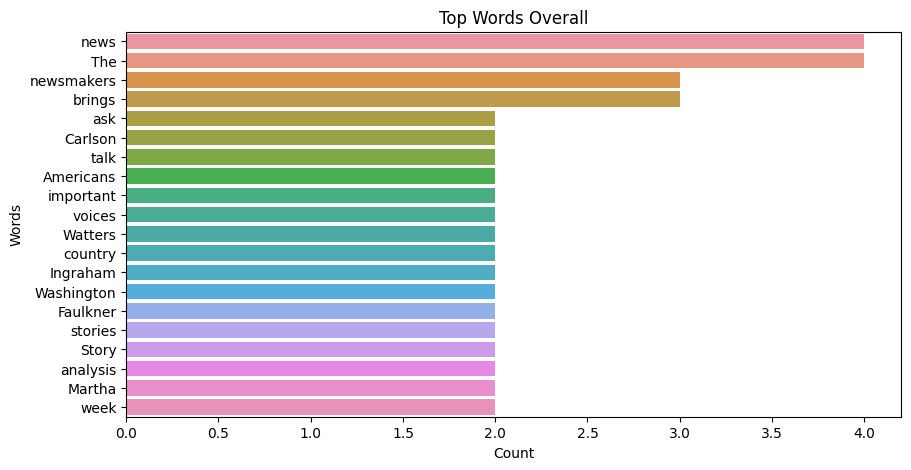

In [30]:
countingdf = countingdf[:20]

plt.figure(figsize=(10,5))
sns.barplot(x=countingdf.values,y=countingdf.index)
plt.title('Top Words Overall')
plt.ylabel('Words')
plt.xlabel("Count")
plt.show()

In [32]:
# Taking mentioned organization

!python -m spacy download en_core_web_sm

from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

     ---------------------------------------- 12.8/12.8 MB 3.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [52]:
str1 = " "
stem2 = str1.join(lines2)
stem2 = nlp(stem2)
label = [(X.text,X.label_) for X in stem2.ents]
edf1 = pd.DataFrame(label,columns=['Word','Entity'])
edf2 = edf1.where(edf1['Entity'] == 'PERSON')
edf3 = edf2['Word'].value_counts()

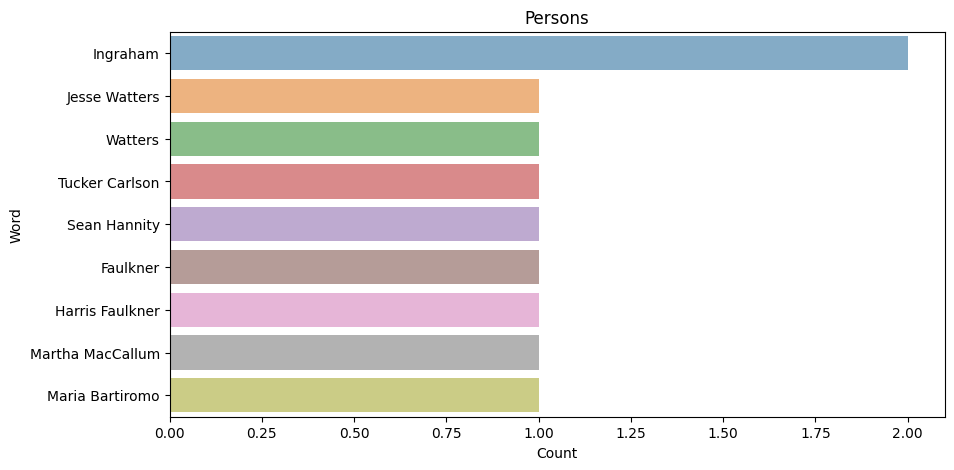

In [54]:
plt.figure(figsize=(10,5))
sns.barplot(x=edf3.values,y=edf3.index,alpha=0.6)
plt.title("Persons")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()